In [13]:
from ema_workbench import load_results
from SALib.analyze import sobol
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# load results of base case
base_case_results = load_results('../data/output/EMA/seedAnalysisBaseCase.tar.gz')
base_case_outcomes = pd.DataFrame(base_case_results[1])

In [16]:
# load results of bad case
bad_case_results = load_results('../data/output/EMA/seedAnalysisBadCase.tar.gz')
bad_case_outcomes = pd.DataFrame(bad_case_results[1])

In [17]:
def plot_convergence(outcomes, sample):
    # create plot axis
    fig, axs = plt.subplots(3, 2, figsize=(20,10))

    # make copy of results and create new df for convergence
    o = outcomes.copy()
    con = pd.DataFrame()
    
    # outcomes index pointer
    o_index = 0

    # calculate mean and standard deviation per sample size 
    for s in range(0, sample):
        con.loc[s, 'sampleSize'] = s + 1
        con.loc[s, 'averageMeanSpeed'] = o.loc[o_index:o_index+s, 'meanSpeed'].mean()
        con.loc[s, 'stdMeanSpeed'] = o.loc[o_index:o_index+s, 'meanSpeed'].std()
        con.loc[s, 'averageMeanDensityArea1'] = o.loc[o_index:o_index+s, 'meanDensityArea1'].mean()
        con.loc[s, 'stdMeanDensityArea1'] = o.loc[o_index:o_index+s, 'meanDensityArea1'].std()
        con.loc[s, 'averageMaxDensityArea1'] = o.loc[o_index:o_index+s, 'maxDensityArea1'].mean()
        con.loc[s, 'stdMaxDensityArea1'] = o.loc[o_index:o_index+s, 'maxDensityArea1'].std()
        o_index += (s + 1)

    con = con.astype({'sampleSize': int})
    con.set_index('sampleSize', inplace=True)

    # plot all
    sns.lineplot(
        ax=axs[0][0],
        data=con,
        x=con.index,
        y='averageMeanSpeed'
    )
    axs[0][0].set(xlabel='sample size (iterations)', ylabel='average speed (m/s)')
    sns.lineplot(
        ax=axs[0][1],
        data=con,
        x=con.index,
        y='stdMeanSpeed'
    )
    axs[0][1].set(xlabel='sample size (iterations)', ylabel='std speed (m/s)')
    sns.lineplot(
        ax=axs[1][0],
        data=con,
        x=con.index,
        y='averageMeanDensityArea1'
    )
    axs[1][0].set(xlabel='sample size (iterations)', ylabel='average density (#/m²)')
    sns.lineplot(
        ax=axs[1][1],
        data=con,
        x=con.index,
        y='stdMeanDensityArea1'
    )
    axs[1][1].set(xlabel='sample size (iterations)', ylabel='std average density (#/m²)')
    sns.lineplot(
        ax=axs[2][0],
        data=con,
        x=con.index,
        y='averageMaxDensityArea1'
    )
    axs[2][0].set(xlabel='sample size (iterations)', ylabel='max density (#/m²)')
    sns.lineplot(
        ax=axs[2][1],
        data=con,
        x=con.index,
        y='stdMaxDensityArea1'
    )
    axs[2][1].set(xlabel='sample size (iterations)', ylabel='std max density (#/m²)')

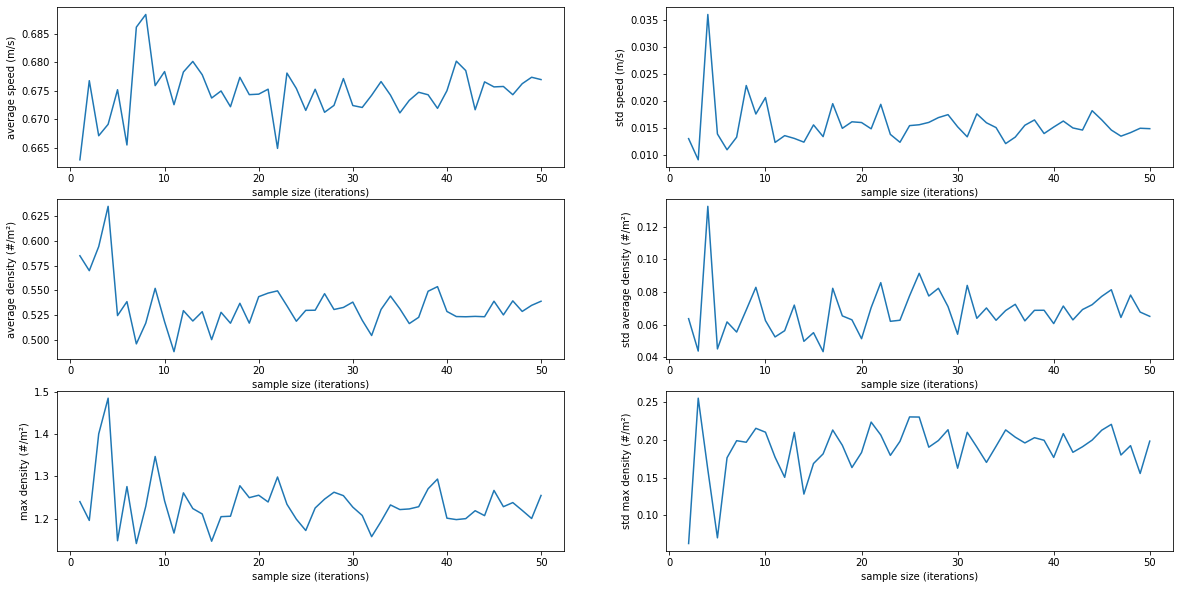

In [18]:
plot_convergence(base_case_outcomes, 50)

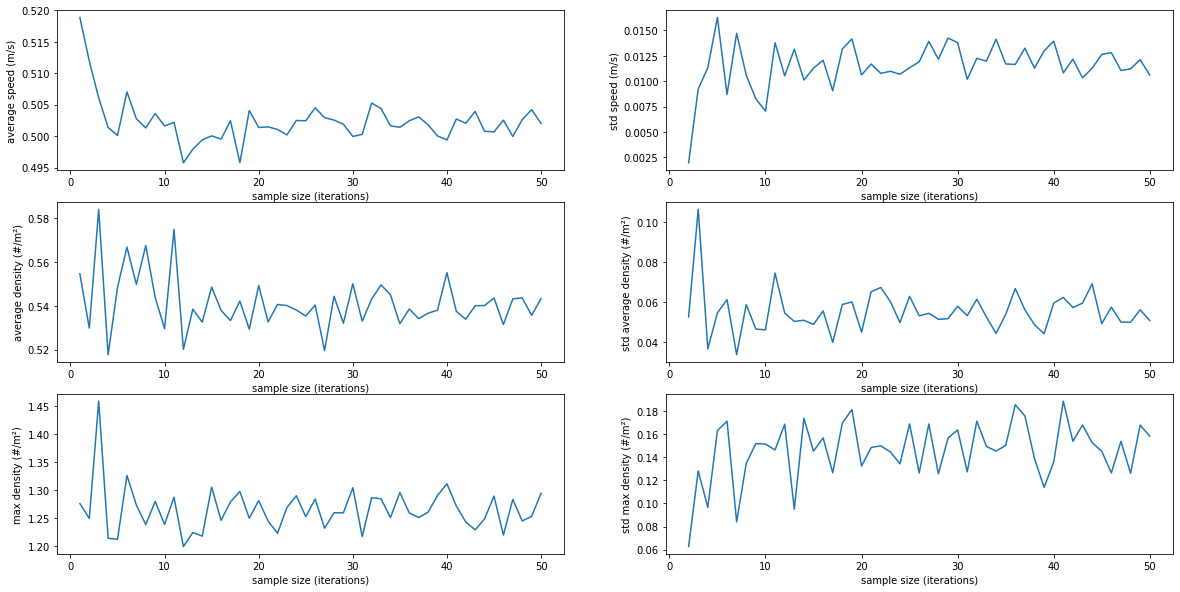

In [19]:
plot_convergence(bad_case_outcomes, 50)

In [26]:
def plot_convergence_2(outcomes, sample):
    # create plot axis
    fig, axs = plt.subplots(3, 2, figsize=(20,10))

    # make copy of results
    con = outcomes.copy().head(sample)

    # calculate mean per sample size for all outcomes
    for index, row in con.iterrows():
        con.loc[index, 'averageMeanSpeed'] = con.loc[index:, 'meanSpeed'].mean()
        con.loc[index, 'stdMeanSpeed'] = con.loc[:index, 'meanSpeed'].std()
        con.loc[index, 'averageMeanDensityArea1'] = con.loc[:index, 'meanDensityArea1'].mean()
        con.loc[index, 'stdMeanDensityArea1'] = con.loc[:index, 'meanDensityArea1'].std()
        con.loc[index, 'averageMaxDensityArea1'] = con.loc[:index, 'maxDensityArea1'].mean()
        con.loc[index, 'stdMaxDensityArea1'] = con.loc[:index, 'maxDensityArea1'].std()

    con.reset_index(inplace=True)

    # plot all
    sns.lineplot(
        ax=axs[0][0],
        data=con,
        x=con.index,
        y='averageMeanSpeed'
    )
    axs[0][0].set(xlabel='sample size (iterations)', ylabel='average speed (m/s)')
    sns.lineplot(
        ax=axs[0][1],
        data=con,
        x=con.index,
        y='stdMeanSpeed'
    )
    axs[0][1].set(xlabel='sample size (iterations)', ylabel='std speed (m/s)')
    sns.lineplot(
        ax=axs[1][0],
        data=con,
        x=con.index,
        y='averageMeanDensityArea1'
    )
    axs[1][0].set(xlabel='sample size (iterations)', ylabel='average density (#/m²)')
    sns.lineplot(
        ax=axs[1][1],
        data=con,
        x=con.index,
        y='stdMeanDensityArea1'
    )
    axs[1][1].set(xlabel='sample size (iterations)', ylabel='std average density (#/m²)')
    sns.lineplot(
        ax=axs[2][0],
        data=con,
        x=con.index,
        y='averageMaxDensityArea1'
    )
    axs[2][0].set(xlabel='sample size (iterations)', ylabel='max density (#/m²)')
    sns.lineplot(
        ax=axs[2][1],
        data=con,
        x=con.index,
        y='stdMaxDensityArea1'
    )
    axs[2][1].set(xlabel='sample size (iterations)', ylabel='std max density (#/m²)')

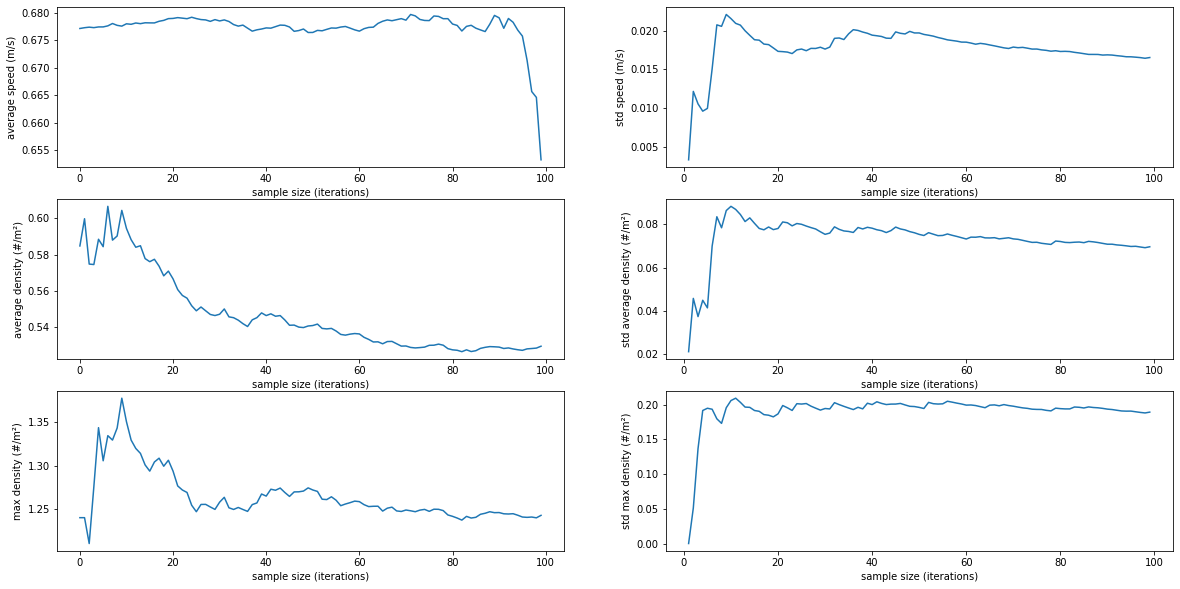

In [27]:
plot_convergence_2(base_case_outcomes, 100)